In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## OMP Particles

In [5]:
omp_particles = pd.read_csv('Results2.0/omp_particles.txt')

In [6]:
omp_particles.tail()

,cores,pop_size,num_particles,final_fitness,gen_count,elapsed,elapsed/gen_count
25,1,2000,128,227188.085230,200,838.918,4.194590
26,1,2000,64,305190.566085,700,787.176,1.124538
27,1,2000,32,142348.253095,517,150.993,0.292056
28,1,2000,16,69214.420779,207,14.731,0.071166
29,1,2000,8,40710.391489,167,2.961,0.017729


In [7]:
cores = omp_particles[omp_particles[' num_particles']==64]['cores'].unique()

### Strong scaling test

Text(0, 0.5, 'Speed-up')

/home/matt/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


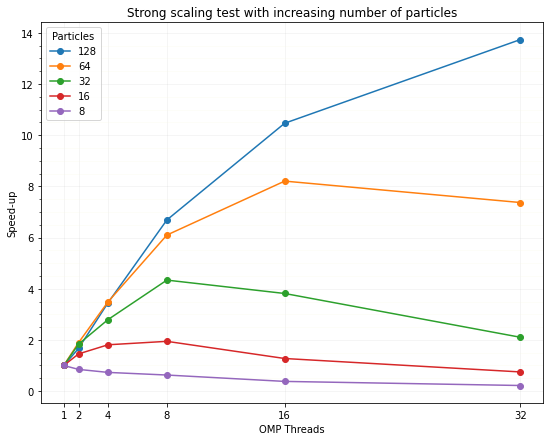

In [8]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
for num_particles in omp_particles[' num_particles'].unique():
    seq_time = omp_particles[(omp_particles[' num_particles']==num_particles)][' elapsed/gen_count'].to_list()[-1]
    plt.plot(cores,seq_time/omp_particles[omp_particles[' num_particles']==num_particles][' elapsed/gen_count'], 
             marker='o')
plt.xticks(ticks = cores)
plt.legend([128,64,32,16,8],title="Particles")
plt.title('Strong scaling test with increasing number of particles')
plt.xlabel('OMP Threads')
plt.ylabel('Speed-up')

### Weak Scaling test

Text(0, 0.5, 'Speed-up')

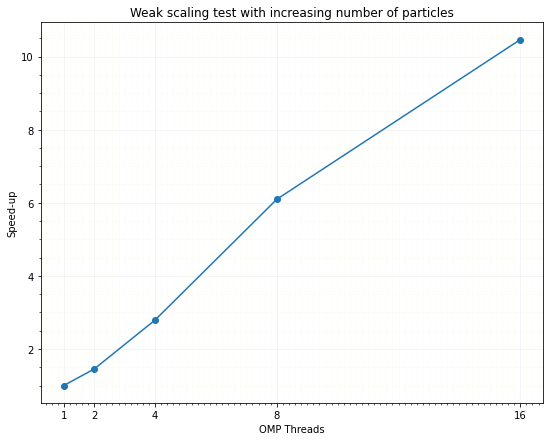

In [9]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
times = []
seq_times = []
particles = omp_particles[' num_particles'].unique()[::-1]
cores = omp_particles['cores'].unique()[::-1]
for i in range(len(cores)-1):
    x = omp_particles[omp_particles[' num_particles']==particles[i]].loc[omp_particles['cores']==cores[i]][' elapsed/gen_count'].to_list()[0]
    seq_time = omp_particles[omp_particles[' num_particles']==particles[i]].loc[omp_particles['cores']==1][' elapsed/gen_count'].to_list()[0]
    times.append(x)
    seq_times.append(seq_time)
plt.plot(cores[:-1],np.array(seq_times)/np.array(times), marker='o')
plt.xticks(ticks = cores[:-1])
plt.title('Weak scaling test with increasing number of particles')
plt.xlabel('OMP Threads')
plt.ylabel('Speed-up')

## OMP population

In [10]:
omp_pop = pd.read_csv('Results2.0/omp_population.txt')

In [11]:
omp_pop.head(6)

,cores,pop_size,num_particles,final_fitness,gen_count,elapsed,elapsed/gen_count
0,32,64000,20,97660.766334,138,462.833,3.353862
1,32,32000,20,97660.782973,156,350.173,2.244697
2,32,16000,20,97660.782970,238,206.821,0.868994
3,32,8000,20,85399.000567,241,87.630,0.363610
4,32,4000,20,97660.502924,258,50.118,0.194257
5,32,2000,20,97660.055528,473,44.343,0.093748


In [12]:
cores = omp_pop[omp_pop[' pop_size']==64000]['cores'].to_list()

In [13]:
omp_pop[omp_pop[' pop_size']==64000][' elapsed/gen_count'].to_list()[-1]/omp_pop[omp_pop[' pop_size']==64000][' elapsed/gen_count']

0     0.873494
6     1.480109
12    1.872655
18    1.796519
29    1.191888
35    1.000000
Name:  elapsed/gen_count, dtype: float64

### Strong scaling test

Text(0, 0.5, 'Speed-up')

/home/matt/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


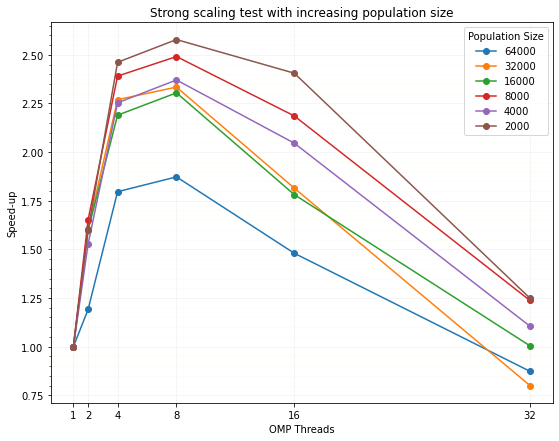

In [14]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
for pop in omp_pop[' pop_size'].unique():
    seq_time = omp_pop[omp_pop[' pop_size']==pop][' elapsed/gen_count'].to_list()[-1]
    plt.plot(cores, seq_time/omp_pop[omp_pop[' pop_size']==pop][' elapsed/gen_count'], marker='o')
plt.xticks(ticks = cores)
plt.legend([64000,32000,16000,8000,4000,2000],title="Population Size")
plt.title('Strong scaling test with increasing population size')
plt.xlabel('OMP Threads')
plt.ylabel('Speed-up')

### Weak scaling test

Text(0, 0.5, 'Speed-up')

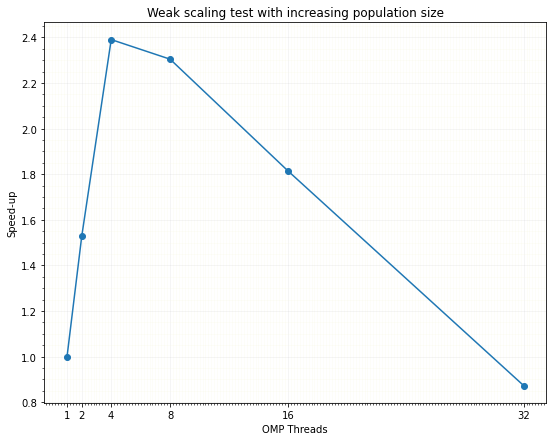

In [15]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
times = []
seq_times = []
pops = omp_pop[' pop_size'].unique()[::-1]
cores = omp_pop['cores'].unique()
cores = cores[::-1]
for i in range(len(cores)):
    x = omp_pop[omp_pop[' pop_size']==pops[i]].loc[omp_pop['cores']==cores[i]][' elapsed/gen_count'].to_list()[0]
    seq_time = omp_pop[omp_pop[' pop_size']==pops[i]].loc[omp_pop['cores']==1][' elapsed/gen_count'].to_list()[0]
    times.append(x)
    seq_times.append(seq_time)
plt.plot(cores,np.array(seq_times)/np.array(times), marker='o')
plt.xticks(ticks = cores)
plt.title('Weak scaling test with increasing population size')
plt.xlabel('OMP Threads')
plt.ylabel('Speed-up')

## MPI particles

In [16]:
mpi_particles = pd.read_csv('Results2.0/mpi_particles.txt')

In [17]:
mpi_particles.tail()

,cores,pop_size,num_particles,migration_interval,migration_rate,final_fitness,gen_count,elapsed,elapsed/gen_count
25,1,2000,128,50,0.05,214700.832710,200,1822.936,9.114678
26,1,2000,64,50,0.05,227578.157888,200,277.993,1.389964
27,1,2000,32,50,0.05,175157.693659,800,519.459,0.649323
28,1,2000,16,50,0.05,81420.585938,800,126.830,0.158538
29,1,2000,8,50,0.05,32480.000000,800,31.543,0.039429


### Strong scaling test

Text(0, 0.5, 'Speed-up')

/home/matt/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


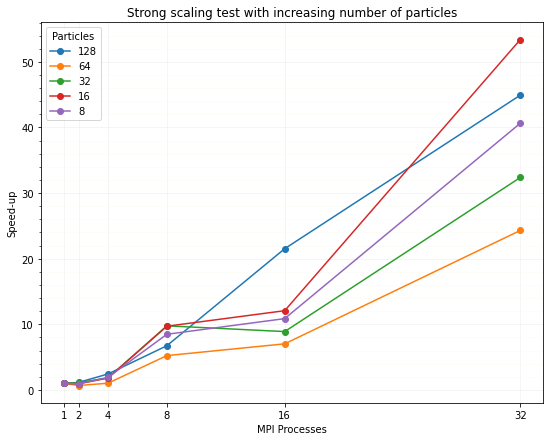

In [18]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
cores = mpi_particles['cores'].unique()
for num_particles in mpi_particles[' num_particles'].unique():
    seq_time = mpi_particles[(mpi_particles[' num_particles']==num_particles)][' elapsed/gen_count'].to_list()[-1]
    plt.plot(cores,seq_time/mpi_particles[omp_particles[' num_particles']==num_particles][' elapsed/gen_count'], 
             marker='o')
plt.xticks(ticks = cores)
plt.legend([128,64,32,16,8],title="Particles")
plt.title('Strong scaling test with increasing number of particles')
plt.xlabel('MPI Processes')
plt.ylabel('Speed-up')

### Weak scaling test

Text(0, 0.5, 'Speed-up')

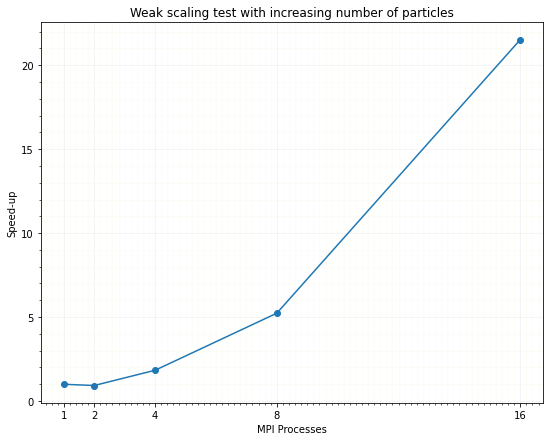

In [19]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
times = []
seq_times = []
particles = mpi_particles[' num_particles'].unique()[::-1]
cores = mpi_particles['cores'].unique()[::-1]
for i in range(len(cores)-1):
    x = mpi_particles[mpi_particles[' num_particles']==particles[i]].loc[mpi_particles['cores']==cores[i]][' elapsed/gen_count'].to_list()[0]
    seq_time = mpi_particles[mpi_particles[' num_particles']==particles[i]].loc[mpi_particles['cores']==1][' elapsed/gen_count'].to_list()[0]
    times.append(x)
    seq_times.append(seq_time)
plt.plot(cores[:-1],np.array(seq_times)/np.array(times), marker='o')
plt.xticks(ticks = cores[:-1])
plt.title('Weak scaling test with increasing number of particles')
plt.xlabel('MPI Processes')
plt.ylabel('Speed-up')

## MPI population

In [20]:
mpi_pop = pd.read_csv('Results2.0/mpi_population.txt')

In [21]:
mpi_pop.tail()

,cores,pop_size,num_particles,migration_interval,migration_rate,final_fitness,gen_count,elapsed,elapsed/gen_count
31,1,32000,20,50,0.05,97605.112088,800,3419.622,4.274528
32,1,16000,20,50,0.05,97660.782229,800,1152.072,1.440089
33,1,8000,20,50,0.05,97660.782965,800,398.199,0.497748
34,1,4000,20,50,0.05,97660.782978,800,201.068,0.251335
35,1,2000,20,50,0.05,97605.392047,800,100.161,0.125201


Text(0, 0.5, 'Speed-up')

/home/matt/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


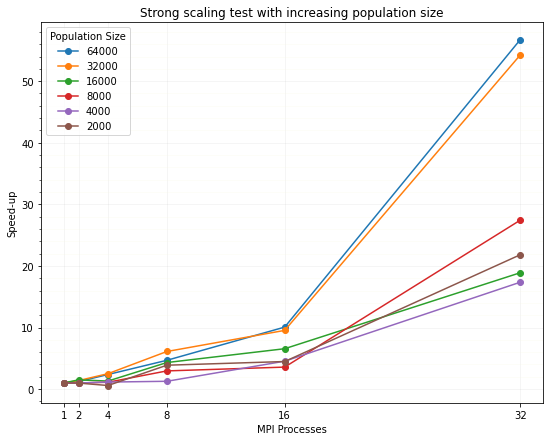

In [22]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
cores = mpi_pop['cores'].unique()
for pop in mpi_pop[' pop_size'].unique():
    seq_time = mpi_pop[mpi_pop[' pop_size']==pop][' elapsed/gen_count'].to_list()[-1]
    plt.plot(cores, seq_time/mpi_pop[mpi_pop[' pop_size']==pop][' elapsed/gen_count'], marker='o')
plt.xticks(ticks = cores)
plt.legend([64000,32000,16000,8000,4000,2000],title="Population Size")
plt.title('Strong scaling test with increasing population size')
plt.xlabel('MPI Processes')
plt.ylabel('Speed-up')

### Weak Scaling

Text(0, 0.5, 'Speed-up')

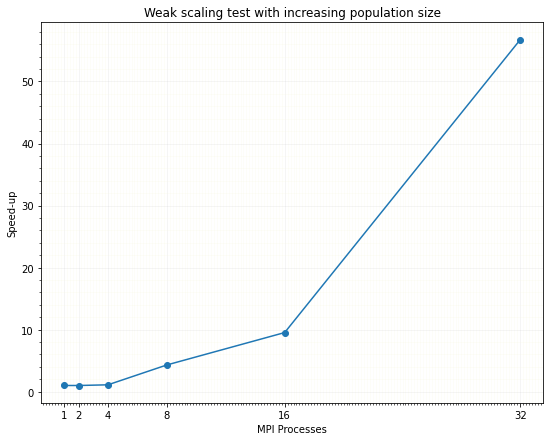

In [23]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
times = []
seq_times = []
pops = mpi_pop[' pop_size'].unique()[::-1]
cores = mpi_pop['cores'].unique()
cores = cores[::-1]
for i in range(len(cores)):
    x = mpi_pop[mpi_pop[' pop_size']==pops[i]].loc[mpi_pop['cores']==cores[i]][' elapsed/gen_count'].to_list()[0]
    seq_time = mpi_pop[mpi_pop[' pop_size']==pops[i]].loc[mpi_pop['cores']==1][' elapsed/gen_count'].to_list()[0]
    times.append(x)
    seq_times.append(seq_time)
plt.plot(cores,np.array(seq_times)/np.array(times), marker='o')
plt.xticks(ticks = cores)
plt.title('Weak scaling test with increasing population size')
plt.xlabel('MPI Processes')
plt.ylabel('Speed-up')

# Comparing HPC to Laptop

## MPI

### Particles

In [65]:
cores_lap = [1,2,4][::-1]
cores = [1,2,4,8,16,32][::-1]
particles = [8,16,32,64,128]
particles_lap = [8,16,32,64]

In [66]:
mpi_particles_lap = pd.read_csv('Results2.0/laptop/mpi/mpi_particles.txt')
mpi_particles_lap.head()

,cores,pop_size,num_particles,migration_interval,migration_rate,final_fitness,gen_count,elapsed,elapsed/gen_count
0,4,2000,8,50,0.05,40710.391489,800,1.143,0.001429
1,4,2000,16,50,0.05,69103.000576,800,5.072,0.006341
2,4,2000,32,50,0.05,158753.171875,800,20.406,0.025507
3,4,2000,64,50,0.05,272710.953840,800,80.317,0.100397
4,2,2000,8,50,0.05,40710.391489,800,1.531,0.001913


In [112]:
colors = ['red','purple','green','blue','brown']

In [113]:
mpi_particles[mpi_particles[' num_particles']==8].loc[mpi_particles['cores']==1][' elapsed/gen_count'].to_list()[0]

0.039429

Text(0, 0.5, 'Speed-up')

/home/matt/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


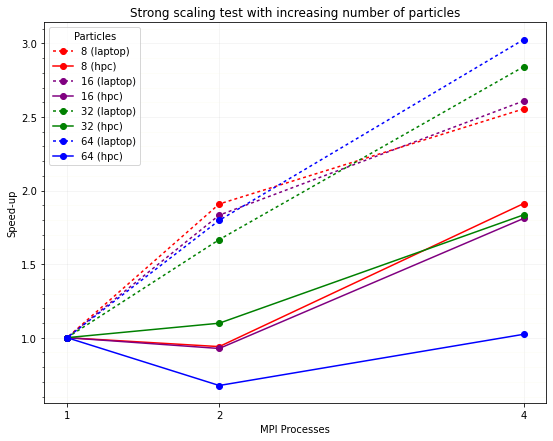

In [114]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
col_index = 0
for particle in particles_lap:
    seq_time_lap = mpi_particles_lap[mpi_particles_lap[' num_particles']==particle].loc[mpi_particles_lap['cores']==1][' elapsed/gen_count'].to_list()[0]
    seq_time = mpi_particles[mpi_particles[' num_particles']==particle].loc[mpi_particles['cores']==1][' elapsed/gen_count'].to_list()[0]
    plt.plot(cores_lap,seq_time_lap/mpi_particles_lap[mpi_particles_lap[' num_particles']==particle][' elapsed/gen_count'],
             marker='o',color=colors[col_index], dashes=[2,2])
    plt.plot(cores[-3:],seq_time/mpi_particles[mpi_particles[' num_particles']==particle].loc[mpi_particles['cores'] <= 4][' elapsed/gen_count'],
             marker='o',color=colors[col_index])
    col_index+=1
plt.xticks(ticks = cores_lap)
plt.legend(['8 (laptop)','8 (hpc)','16 (laptop)','16 (hpc)','32 (laptop)','32 (hpc)','64 (laptop)','64 (hpc)'],title="Particles")
plt.title('Strong scaling test with increasing number of particles')
plt.xlabel('MPI Processes')
plt.ylabel('Speed-up')

### Weak scaling

### Population

In [103]:
cores_lap = [1,2,4][::-1]
cores = [1,2,4,8,16,32][::-1]
pops = [2000,8000,16000,64000]

In [104]:
mpi_pop_lap = pd.read_csv('Results2.0/laptop/mpi/mpi_population.txt')
mpi_pop_lap.head()

,cores,pop_size,num_particles,migration_interval,migration_rate,final_fitness,gen_count,elapsed,elapsed/gen_count
0,4,2000,20,50,0.05,101745.564570,800,7.553,0.009441
1,4,4000,20,50,0.05,105998.225949,800,16.192,0.020240
2,4,8000,20,50,0.05,97660.782976,800,28.889,0.036112
3,4,16000,20,50,0.05,97660.782978,800,60.222,0.075278
4,4,32000,20,50,0.05,122402.884370,800,118.541,0.148177


In [115]:
colors = ['red','purple','green','blue','brown']

In [116]:
mpi_pop[mpi_pop[' pop_size']==32000].loc[mpi_pop['cores']<=4]

,cores,pop_size,num_particles,migration_interval,migration_rate,final_fitness,gen_count,elapsed,elapsed/gen_count
19,4,32000,20,50,0.05,109922.087843,800,1366.955,1.708694
25,2,32000,20,50,0.05,97660.782962,800,2477.708,3.097135
31,1,32000,20,50,0.05,97605.112088,800,3419.622,4.274528


Text(0, 0.5, 'Speed-up')

/home/matt/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


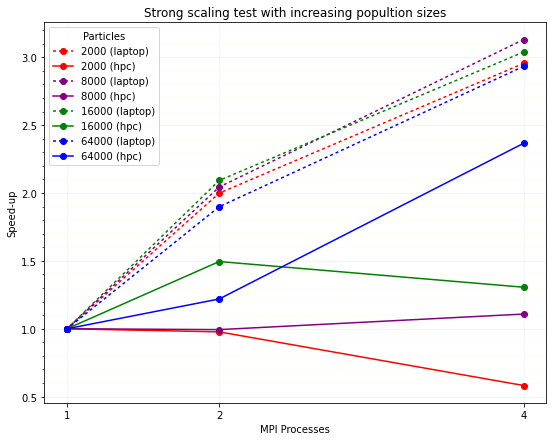

In [117]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
col_index = 0
for pop in pops:
    seq_time_lap = mpi_pop_lap[mpi_pop_lap[' pop_size']==pop].loc[mpi_pop_lap['cores']==1][' elapsed/gen_count'].to_list()[0]
    seq_time = mpi_pop[mpi_pop[' pop_size']==pop].loc[mpi_pop['cores']==1][' elapsed/gen_count'].to_list()[0]
    plt.plot(cores_lap,seq_time_lap/mpi_pop_lap[mpi_pop_lap[' pop_size']==pop][' elapsed/gen_count'],
             marker='o',color=colors[col_index], dashes=[2,2])
    plt.plot(cores[-3:],seq_time/mpi_pop[mpi_pop[' pop_size']==pop].loc[mpi_pop['cores'] <= 4][' elapsed/gen_count'],
             marker='o',color=colors[col_index])
    col_index+=1
plt.xticks(ticks = cores_lap)
plt.legend(['2000 (laptop)','2000 (hpc)','8000 (laptop)','8000 (hpc)',
            '16000 (laptop)','16000 (hpc)','64000 (laptop)','64000 (hpc)'],title="Particles")
plt.title('Strong scaling test with increasing popultion sizes')
plt.xlabel('MPI Processes')
plt.ylabel('Speed-up')

## OMP

### Particles

In [118]:
cores_lap = [1,2,4][::-1]
cores = [1,2,4,8,16,32][::-1]
particles = [8,16,32,64,128]
particles_lap = [8,16,32,64]

In [119]:
omp_particles_lap = pd.read_csv('Results2.0/laptop/omp/omp_particles.txt')
omp_particles_lap.head()

,cores,pop_size,num_particles,final_fitness,gen_count,elapsed,elapsed/gen_count
0,4,2000,8,28447.750144,152,9.369,0.061638
1,4,2000,16,69214.420779,290,19.186,0.066160
2,4,2000,32,167093.910936,500,41.814,0.083628
3,4,2000,64,321704.288512,758,123.287,0.162648
4,2,2000,8,36678.501357,126,4.205,0.033375


In [127]:
omp_particles_lap[omp_particles_lap[' num_particles']==16]

,cores,pop_size,num_particles,final_fitness,gen_count,elapsed,elapsed/gen_count
1,4,2000,16,69214.420779,290,19.186,0.066160
5,2,2000,16,69157.861656,162,7.457,0.046029
9,1,2000,16,69158.750661,171,3.131,0.018310


Text(0, 0.5, 'Speed-up')

/home/matt/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


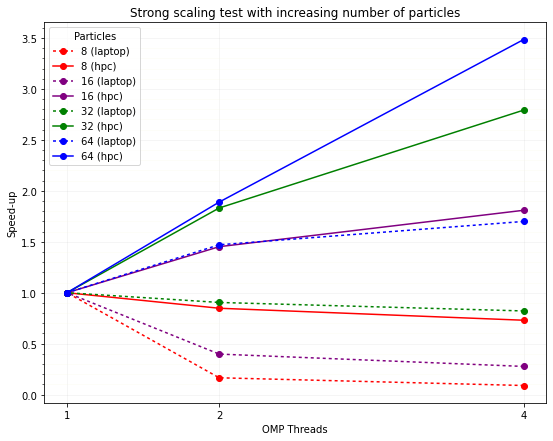

In [128]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
col_index = 0
for particle in particles_lap:
    seq_time_lap = omp_particles_lap[omp_particles_lap[' num_particles']==particle].loc[omp_particles_lap['cores']==1][' elapsed/gen_count'].to_list()[0]
    seq_time = omp_particles[omp_particles[' num_particles']==particle].loc[omp_particles['cores']==1][' elapsed/gen_count'].to_list()[0]
    plt.plot(cores_lap,seq_time_lap/omp_particles_lap[omp_particles_lap[' num_particles']==particle][' elapsed/gen_count'],
             marker='o',color=colors[col_index], dashes=[2,2])
    plt.plot(cores[-3:],seq_time/omp_particles[omp_particles[' num_particles']==particle].loc[omp_particles['cores'] <= 4][' elapsed/gen_count'],
             marker='o',color=colors[col_index])
    col_index+=1
plt.xticks(ticks = cores_lap)
plt.legend(['8 (laptop)','8 (hpc)','16 (laptop)','16 (hpc)','32 (laptop)','32 (hpc)','64 (laptop)','64 (hpc)'],title="Particles")
plt.title('Strong scaling test with increasing number of particles')
plt.xlabel('OMP Threads')
plt.ylabel('Speed-up')

### Population

In [142]:
cores_lap = [1,2,4][::-1]
cores = [1,2,4,8,16,32][::-1]
pops = [2000,8000,16000,64000]

In [173]:
omp_pop_lap = pd.read_csv('Results2.0/laptop/omp/omp_population.txt')
omp_pop_lap.head()

,cores,pop_size,num_particles,final_fitness,gen_count,elapsed,elapsed/gen_count
0,4,2000,20,89652.607098,300,20.117,0.067056
1,4,4000,20,97660.054245,248,33.103,0.133478
2,4,8000,20,97660.583084,159,42.863,0.269581
3,4,16000,20,89430.391477,229,123.066,0.537407
4,4,32000,20,89430.391488,169,182.108,1.077564


Text(0, 0.5, 'Speed-up')

/home/matt/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


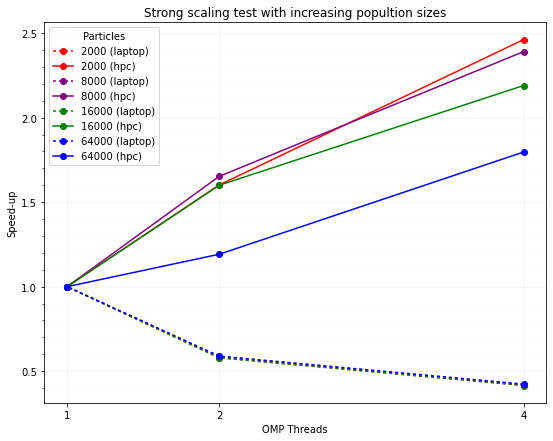

In [163]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
col_index = 0
for pop in pops:
    seq_time_lap = omp_pop_lap[omp_pop_lap[' pop_size']==pop].loc[omp_pop_lap['cores']==1][' elapsed/gen_count'].to_list()[0]
    seq_time = omp_pop[omp_pop[' pop_size']==pop].loc[omp_pop['cores']==1][' elapsed/gen_count'].to_list()[0]
    plt.plot(cores_lap,seq_time_lap/omp_pop_lap[omp_pop_lap[' pop_size']==pop][' elapsed/gen_count'],
             marker='o',color=colors[col_index], dashes=[2,2])
    plt.plot(cores[-3:],seq_time/omp_pop[omp_pop[' pop_size']==pop].loc[omp_pop['cores'] <= 4][' elapsed/gen_count'],
             marker='o',color=colors[col_index])
    col_index+=1
plt.xticks(ticks = cores_lap)
plt.legend(['2000 (laptop)','2000 (hpc)','8000 (laptop)','8000 (hpc)',
            '16000 (laptop)','16000 (hpc)','64000 (laptop)','64000 (hpc)'],title="Particles")
plt.title('Strong scaling test with increasing popultion sizes')
plt.xlabel('OMP Threads')
plt.ylabel('Speed-up')